## Logistic regression

Build a logistic regression to predict whether a student will be enrolled into a university.

For the training data, we have the applicant's score on two examples and the admission decision.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
# Load training data, the first two columns contains the exam score and the third column contains the label
train=pd.read_csv('ex2data1.txt', names=['exam1','exam2', 'result'])
print(train.head(2))
print(train.tail(2))
print(train.shape)

       exam1      exam2  result
0  34.623660  78.024693       0
1  30.286711  43.894998       0
        exam1      exam2  result
98  55.340018  64.931938       1
99  74.775893  89.529813       1
(100, 3)


In [111]:
X=train[['exam1','exam2']]
y=train['result']
m,n=X.shape[0], X.shape[1]
X=pd.concat((pd.DataFrame(np.ones((m,1))), X), axis=1) # add x0=1 for X
X.head(2)
m,n=X.shape[0], X.shape[1]

### Part I: Visualization: plot

we start by plotting the data we are working with

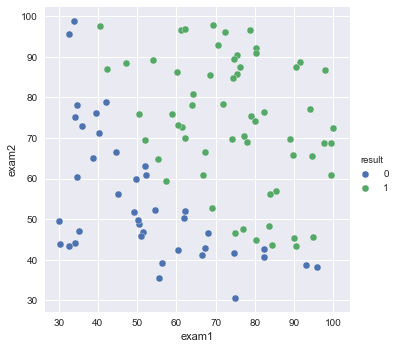

In [66]:
sns.pairplot(x_vars='exam1', y_vars='exam2', data=train, hue='result',size=5)

### Part II: Implementation

#### 2.1 Sigmoid function

In [67]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """  

In [68]:
# Check the sigmoid function on a scalor, series and data frame
print(sigmoid(0))
print(sigmoid(np.array([0,0,0])))
print(sigmoid(np.zeros((5,5))))

0.5
[ 0.5  0.5  0.5]
[[ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 0.5  0.5  0.5  0.5  0.5]]


#### 2.2 Cost function and gradient

In [69]:
def costFunction(theta, X, y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the parameter for logistic regression 
    and the gradient of the cost w.r.t. to the parameters.
    """

    # Initialize some useful values
    m = len(y)
    grad = np.zeros(len(theta))

# Compute the cost of a particular choice of theta. You should set J to the cost.
# Compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta
    J=(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))/m
    grad=X.T.dot((sigmoid(X.dot(theta))-np.array(y).reshape(m,1)))/m
    return (J,grad)

In [70]:
# Initialize fitting parameters
initial_theta = np.zeros((n, 1))

# Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y)
print(cost)
grad

0    0.693147
Name: result, dtype: float64


,0
0,-0.100000
exam1,-12.009217
exam2,-11.262842


In [71]:
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ', grad);
print('Expected gradients (approx):-0.1000, -12.0092, -11.2628')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2]).reshape(3,1)
[cost, grad] = costFunction(test_theta, X, y)

print('Cost at test theta: %f\n', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(' %f \n', grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at initial theta (zeros): 0    0.693147
Name: result, dtype: float64
Expected cost (approx): 0.693
Gradient at initial theta (zeros):                 0
0      -0.100000
exam1 -12.009217
exam2 -11.262842
Expected gradients (approx):-0.1000, -12.0092, -11.2628
Cost at test theta: %f
 0    0.21833
Name: result, dtype: float64
Expected cost (approx): 0.218

Gradient at test theta: 

 %f 
               0
0      0.042903
exam1  2.566234
exam2  2.646797
Expected gradients (approx):
 0.043
 2.566
 2.647



#### 2.3 Learning parameters using fminunc

Concretely, you are going to use fminunc to find the best parameters theta
for the logistic regression cost function, given a fixed dataset (of X and y
values). You will pass to fminunc the following inputs:

1. The initial values of the parameters we are trying to optimize theta

2. A function, given the training set (X,y) that compute the J, grad with respect to theta data (X,y)

In [175]:
import numpy as np
import scipy.optimize as op

X=np.array(X)
y=np.array(y)

def Sigmoid(z):
    return 1/(1 + np.exp(-z));

def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1));
    y = y.reshape((m,1))
    sigmoid_x_theta = Sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m;
    return grad.flatten();

def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1));
    y = y.reshape((m,1));
    term1 = np.log(Sigmoid(x.dot(theta)));
    term2 = np.log(1-Sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m);
    return J;

m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = CostFunc, x0 = initial_theta, args = (X, y),method = 'TNC',jac = Gradient);
optimal_theta = Result.x;     
optimal_theta

array([-25.16131853,   0.20623159,   0.20147149])

In [176]:
# Plot decision boundary

def plotDecisionBoundary(theta, X, y, train):
    """
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the positive examples and o 
    for the negative examples. 
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones
    """
    sns.pairplot(x_vars='exam1', y_vars='exam2', data=train, hue='result', size=5)
    
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])

    # Calculate the decision boundary line
    plot_y = (-1./optimal_theta[2]*(optimal_theta[1]*plot_x + optimal_theta[0]))
    plt.plot(plot_x, plot_y, label='decision boundary')
    plt.legend(loc='upper right')
                    

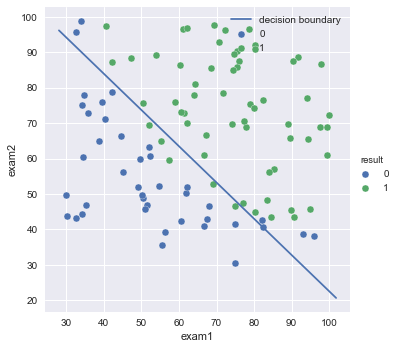

In [169]:
plotDecisionBoundary(optimal_theta, X, y, train)

#### 2.4 Evaluate a logistic regression

In [177]:
# Predict whether a student with exam1 45 and exam2 85 will be admiteed or not
y_pred=Sigmoid(np.sum(optimal_theta*([1,45,85])))
print('Expected admission rate using scipy.optimize is:', y_pred)
print('Admission rate using Matlab fminunc:', 0.776)

Expected admission rate using scipy.optimize is: 0.776290622089
Admission rate using Matlab fminunc: 0.776


The predict function will produce 1 or 0 predictions given a dataset and a learned parameter
vector of theta. 

In [185]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    m,n = X.shape
    p = np.zeros((m, 1))
    theta_x=X.dot(theta.reshape(n,1))
    prob=Sigmoid(theta_x)
    p=(prob>=0.5).astype(int)
    return p


In [201]:
p=predict(optimal_theta, X)

In [228]:
print('Train Accuracy:', np.mean((p.reshape(100,)==y).astype(int)) * 100);
print('Expected accuracy (approx): 89.0\n');

Train Accuracy: 89.0
Expected accuracy (approx): 89.0

